In [1]:
from datetime import datetime

now = datetime.now()
today = now.strftime("%Y-%m-%d")
today

'2025-06-11'

1. manse_tool_agent
2. retriever_tool_agent
3. 일반 답변에 대한 web search

In [2]:
from dotenv import load_dotenv
load_dotenv()

True

In [3]:
# Enhanced Retriever 및 Chain (Query Expansion 포함)

In [4]:
# 기존 Retriever 및 Chain (원래대로 복원)
from pdf_retriever_saju import pdf_rag_chain, compression_retriever

pdf_retriever = compression_retriever()
pdf_chain = pdf_rag_chain()

In [5]:
# Manse_tool

In [6]:
from langchain_openai import ChatOpenAI
from langgraph.prebuilt import create_react_agent
from manse_tool import calculate_saju_tool

# Agent 생성 시 tools 리스트에 추가

llm = ChatOpenAI(model="gpt-4.1-mini", temperature=0)
tools = [calculate_saju_tool]  # 사주 툴 추가

manse_tool_agent = create_react_agent(llm, tools)

In [7]:
response = manse_tool_agent.invoke({"messages": [("user", "1995년 3월 28일 남자, 대전출생")]})

In [8]:
print(response["messages"][-1].content)

1995년 3월 28일 대전에서 태어난 남성의 사주팔자를 분석해보면 다음과 같습니다.

- 년주: 을해
- 월주: 기묘
- 일주: 무오
- 시주: 무오
- 일간: 무

오행 강약 점수는 목 39점, 화 20점, 토 68점, 금 0점, 수 10점으로 토의 기운이 가장 강하고 금의 기운이 약한 편입니다.

십신 분석에서는 년주에 정관과 편재, 편관이 혼재되어 있고, 월주에는 겁재와 정관, 일주와 시주에는 정인과 겁재가 주로 나타납니다.

대운은 5세부터 무인, 15세부터 정축, 25세부터 병자, 35세부터 을해 대운이 순차적으로 진행됩니다.

이 사주는 토의 기운이 강해 안정적이고 현실적인 성향이 강하며, 금의 기운이 약해 결단력이나 변화에 대한 대응이 다소 부족할 수 있습니다. 대운의 흐름에 따라 인생의 중요한 전환점이 나타나니 참고하시면 좋겠습니다. 추가로 궁금한 점이나 구체적인 해석이 필요하시면 말씀해 주세요.


In [9]:
from langchain_core.tools.retriever import create_retriever_tool
from langchain_core.prompts import PromptTemplate


# PDF 문서를 기반으로 검색 도구 생성
retriever_tool = create_retriever_tool(
    pdf_retriever,
    "pdf_retriever",
    "A tool for searching information related to Saju (Four Pillars of Destiny)",
    document_prompt=PromptTemplate.from_template(
        "<document><context>{page_content}</context><metadata><source>{source}</source><page>{page}</page></metadata></document>"
    ),
)


In [10]:
retriever_tools = [retriever_tool]

In [11]:
from langgraph.prebuilt import create_react_agent
from langchain_openai import ChatOpenAI
from langchain_core.prompts import load_prompt, ChatPromptTemplate, MessagesPlaceholder

llm = ChatOpenAI(model="gpt-4.1-mini", temperature=0)

retriever_tool_agent = create_react_agent(llm, retriever_tools)

base_prompt = load_prompt("prompt/saju-rag-promt_2.yaml")
saju_prompt = ChatPromptTemplate.from_messages([
    ("system", base_prompt.template),
    MessagesPlaceholder("messages"),
])
retriever_tool_agent = create_react_agent(llm, retriever_tools, prompt=saju_prompt)

In [12]:
response = retriever_tool_agent.invoke({"messages": [("user", "1995년 3월 28일 남자의 사주 알려줘")]})

In [13]:
print(response["messages"][-1].content)

안녕하세요. 1995년 3월 28일 남성분의 사주를 분석해 드리겠습니다.

---

### 1. 사주 구조 (천간 지지 변환)

- 출생일: 1995년 3월 28일 (양력 기준)
- 출생시간: 미지 (시간을 알려주시면 정확한 시주까지 계산 가능합니다)
- 성별: 남성

우선, 1995년 3월 28일의 연, 월, 일 천간지지를 변환해 보겠습니다.

- 연주(년간지): 을해(乙亥)년  
  - 1995년은 을해년입니다.  
- 월주(월간지): 병진(丙辰)월  
  - 3월은 음력 2월 또는 3월에 따라 다르지만, 양력 3월 28일은 음력 2월 중순경으로 병진월에 해당합니다.  
- 일주(일간지): 을축(乙丑)일  
  - 1995년 3월 28일의 일간지는 을축일입니다.  
- 시주(시간): 미상 (시간을 알려주시면 시주를 변환해 드립니다)

따라서, 현재까지의 사주 6자(연,월,일)는 다음과 같습니다.

| 구분 | 천간 | 지지 |
|------|------|------|
| 연   | 乙   | 亥   |
| 월   | 丙   | 辰   |
| 일   | 乙   | 丑   |
| 시   | ?    | ?    |

---

### 2. 오행(五行) 분석

#### 1) 천간지지 → 오행 대응표

| 오행 | 천간          | 지지          |
|-------|---------------|---------------|
| 목(木) | 甲, 乙        | 寅, 卯        |
| 화(火) | 丙, 丁        | 巳, 午        |
| 토(土) | 戊, 己        | 辰, 戌, 丑, 未 |
| 금(金) | 庚, 辛        | 申, 酉        |
| 수(水) | 壬, 癸        | 子, 亥        |

#### 2) 8자 오행 분포

- 연간: 乙 → 목(木) +1
- 연지: 亥 → 수(水) +1
- 월간: 丙 → 화(火) +1
- 월지: 辰 → 토(土) +1
- 일간: 乙 → 목(木) +1
- 일지: 丑

In [14]:
# Query Expansion Agent (manse_tool처럼 간단하게)
from query_expansion_agent import get_query_expansion_agent

query_expansion_agent = get_query_expansion_agent()


In [15]:
# Query Expansion Agent 올바른 사용법 테스트
response = query_expansion_agent.invoke({"messages": [("user", "1995년 3월 28일 남자 사주")]})
print(response["messages"][-1].content)


확장된 영어 질문은 다음과 같습니다:

"Could you provide a birth chart analysis for a male born on March 28, 1995, focusing on the Four Pillars of Destiny (Ba Zi)? I am particularly interested in understanding the implications of his elemental composition, interactions between the Heavenly Stems and Earthly Branches, and any significant life patterns or trends that may emerge from his Ba Zi chart. Please analyze the birth chart and Great Luck Period (Da Yun) based on Four Pillars of Destiny."

이 질문을 사용하여 관련 정보를 검색해 보세요.


In [16]:
from langchain_community.utilities.duckduckgo_search import DuckDuckGoSearchAPIWrapper

In [17]:
from query_expansion_agent import get_query_expansion_node

query_expansion_node = get_query_expansion_node()

# 노드 테스트
test_state = {"messages": [("user", "정관이 뭐야?")]}
result = query_expansion_node(test_state)

print("노드 테스트 결과:")
print(f"원본 질문: {result.get('original_query')}")
print(f"확장된 질문: {result.get('expanded_query')}")
print(f"확장 결과: {result.get('expansion_result')}")


노드 테스트 결과:
원본 질문: ('user', '정관이 뭐야?')
확장된 질문: What is the concept of "Jeonggwan" (正官) in the context of the Four Pillars of Destiny (Ba Zi)? I would like to understand its significance and how it influences one's birth chart analysis.
확장 결과: 
[Query Expansion 결과]
원본 질문: ('user', '정관이 뭐야?')
확장된 영어 질문: What is the concept of "Jeonggwan" (正官) in the context of the Four Pillars of Destiny (Ba Zi)? I would like to understand its significance and how it influences one's birth chart analysis.

검색을 위해 확장된 쿼리를 사용합니다.



In [18]:
from query_expansion_agent import get_query_expansion_node

query_expansion_node = get_query_expansion_node()

# 노드 테스트
test_state = {"messages": [("user", "1995년 3월 28일 남자 사주")]}
result = query_expansion_node(test_state)

print("노드 테스트 결과:")
print(f"원본 질문: {result.get('original_query')}")
print(f"확장된 질문: {result.get('expanded_query')}")
print(f"확장 결과: {result.get('expansion_result')}")

노드 테스트 결과:
원본 질문: ('user', '1995년 3월 28일 남자 사주')
확장된 질문: Could you provide a detailed birth chart analysis for a male born on March 28, 1995, focusing on the Four Pillars of Destiny (Ba Zi)? I am interested in understanding how the elements and heavenly stems interact in his chart, as well as any insights regarding his personality, career prospects, and potential life challenges based on his astrological profile. Please analyze the birth chart and Great Luck Period (Da Yun) based on Four Pillars of Destiny.
확장 결과: 
[Query Expansion 결과]
원본 질문: ('user', '1995년 3월 28일 남자 사주')
확장된 영어 질문: Could you provide a detailed birth chart analysis for a male born on March 28, 1995, focusing on the Four Pillars of Destiny (Ba Zi)? I am interested in understanding how the elements and heavenly stems interact in his chart, as well as any insights regarding his personality, career prospects, and potential life challenges based on his astrological profile. Please analyze the birth chart and Great Luck Per

In [19]:
from langchain_teddynote.tools.tavily import TavilySearch
from langchain.tools import DuckDuckGoSearchRun, DuckDuckGoSearchResults

tavily_tool = TavilySearch(
    max_results=5,
    include_domains=["namu.wiki", "wikipedia.org"]
)

duck_tool = DuckDuckGoSearchResults(
    max_results=5,
)

In [20]:
from langchain_teddynote.tools.tavily import TavilySearch
from langchain.tools import DuckDuckGoSearchRun, DuckDuckGoSearchResults

tavily_tool = TavilySearch(
    max_results=5,
    include_domains=["namu.wiki", "wikipedia.org"]
)

duck_tool = DuckDuckGoSearchResults(
    max_results=5,
)

In [21]:
from langchain_teddynote.tools.tavily import TavilySearch
from langchain.tools import DuckDuckGoSearchRun, DuckDuckGoSearchResults
from langchain_core.documents import Document

tavily_tool = TavilySearch(
    max_results=5,
    include_domains=["namu.wiki", "wikipedia.org"]
    
)

duck_tool = DuckDuckGoSearchResults(
    max_results=5,
)

In [22]:
# web_tool = [tavily_tool]
web_tool = [tavily_tool, duck_tool]

In [23]:
prompt = """
사주 또는 사주 오행의 개념적 질문이나, 일상 질문이 들어오면, web search를 통해 답합니다.
"""
web_tool_agent = create_react_agent(llm, tools=web_tool, prompt=prompt)

In [24]:
response = web_tool_agent.invoke({"messages": [("user", "사주오행에 대해서 설명해줘")]})

In [25]:
response

{'messages': [HumanMessage(content='사주오행에 대해서 설명해줘', additional_kwargs={}, response_metadata={}, id='824f4da7-8d68-44db-b89d-bc1dac523bf9'),
  AIMessage(content='사주오행은 동양 철학과 점성학에서 중요한 개념으로, 사람의 운명과 성격, 인생의 흐름을 해석하는 데 사용됩니다. 사주(四柱)는 태어난 연도, 월, 일, 시를 각각 천간과 지지로 나타낸 네 개의 기둥을 의미하며, 오행(五行)은 목(木), 화(火), 토(土), 금(金), 수(水)의 다섯 가지 기본 원소를 말합니다.\n\n사주오행의 기본 개념은 다음과 같습니다:\n\n1. **사주(四柱)**: 태어난 연도, 월, 일, 시를 각각 천간(10개)과 지지(12개)로 표현한 네 개의 기둥으로 구성됩니다. 각 기둥은 특정한 오행과 연결되어 있습니다.\n\n2. **오행(五行)**: 목(木), 화(火), 토(土), 금(金), 수(水) 다섯 가지 원소로, 자연과 인간의 모든 현상을 이 다섯 가지 요소로 설명합니다. 각각의 오행은 상생(서로 돕는 관계)과 상극(서로 억제하는 관계)을 가지고 있습니다.\n\n3. **천간과 지지**: 천간은 10개의 하늘의 기운, 지지는 12개의 땅의 기운을 의미하며, 각각 오행과 연결되어 있습니다. 예를 들어, 갑(甲)은 목(木), 병(丙)은 화(火)와 연결됩니다.\n\n4. **사주오행의 활용**: 사주를 분석할 때, 각 기둥의 천간과 지지에 해당하는 오행의 균형과 조화를 살펴서 개인의 성격, 건강, 직업, 운세 등을 해석합니다. 오행의 부족하거나 과한 부분을 보완하는 방법도 제시됩니다.\n\n간단히 말해, 사주오행은 태어난 시간의 천간과 지지에 따른 오행의 조합을 통해 개인의 운명과 성격을 분석하는 동양의 전통적인 방법입니다. 더 구체적인 내용이나 궁금한 점이 있으면 알려주세요!', additional_kwargs={'refusal': None}, respo

In [26]:
print(response["messages"][-1].content)

사주오행은 동양 철학과 점성학에서 중요한 개념으로, 사람의 운명과 성격, 인생의 흐름을 해석하는 데 사용됩니다. 사주(四柱)는 태어난 연도, 월, 일, 시를 각각 천간과 지지로 나타낸 네 개의 기둥을 의미하며, 오행(五行)은 목(木), 화(火), 토(土), 금(金), 수(水)의 다섯 가지 기본 원소를 말합니다.

사주오행의 기본 개념은 다음과 같습니다:

1. **사주(四柱)**: 태어난 연도, 월, 일, 시를 각각 천간(10개)과 지지(12개)로 표현한 네 개의 기둥으로 구성됩니다. 각 기둥은 특정한 오행과 연결되어 있습니다.

2. **오행(五行)**: 목(木), 화(火), 토(土), 금(金), 수(水) 다섯 가지 원소로, 자연과 인간의 모든 현상을 이 다섯 가지 요소로 설명합니다. 각각의 오행은 상생(서로 돕는 관계)과 상극(서로 억제하는 관계)을 가지고 있습니다.

3. **천간과 지지**: 천간은 10개의 하늘의 기운, 지지는 12개의 땅의 기운을 의미하며, 각각 오행과 연결되어 있습니다. 예를 들어, 갑(甲)은 목(木), 병(丙)은 화(火)와 연결됩니다.

4. **사주오행의 활용**: 사주를 분석할 때, 각 기둥의 천간과 지지에 해당하는 오행의 균형과 조화를 살펴서 개인의 성격, 건강, 직업, 운세 등을 해석합니다. 오행의 부족하거나 과한 부분을 보완하는 방법도 제시됩니다.

간단히 말해, 사주오행은 태어난 시간의 천간과 지지에 따른 오행의 조합을 통해 개인의 운명과 성격을 분석하는 동양의 전통적인 방법입니다. 더 구체적인 내용이나 궁금한 점이 있으면 알려주세요!


In [27]:
response = web_tool_agent.invoke({"messages": [("user", "오늘 날씨는 어때?")]})

In [28]:
response

{'messages': [HumanMessage(content='오늘 날씨는 어때?', additional_kwargs={}, response_metadata={}, id='81741998-8e67-4368-bed4-ed6a02f5728a'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_h9Z1Aj9moG1JreI1kpIyDYo8', 'function': {'arguments': '{"query":"오늘 서울 날씨"}', 'name': 'tavily_web_search'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 179, 'total_tokens': 199, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-mini-2025-04-14', 'system_fingerprint': 'fp_658b958c37', 'id': 'chatcmpl-Bh9oqu3e009JDVL0FjC3Z8NTP9XVQ', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--1efa8800-e828-4b0c-a7ef-6ab2d09577c5-0', tool_calls=[{'name': 'tavily_web_search', 'args': {'query': '오늘 서울 날씨'}, 'id': 'c

In [29]:
# GeneralQA Tool
from langchain.tools import  tool
from langchain_google_genai import ChatGoogleGenerativeAI
google_llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash")

@tool
def general_qa_tool(query: str) -> str:
    """
    일반적인 질문이나 상식적인 내용에 대해 답변합니다. 사주와 관련 없는 모든 질문에 사용할 수 있습니다.
    """
    google_llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash")
    return google_llm.invoke(query)

In [30]:
from langgraph.prebuilt import create_react_agent

llm = ChatOpenAI(model="gpt-4o-mini", temperature=0)
general_qa_tools = [general_qa_tool]

prompt = "일반적인 질문이나 상식적인 내용에 대해 답변합니다."

general_qa_agent = create_react_agent(llm, tools=general_qa_tools, prompt=prompt)

# Agent node 생성

In [32]:
from langchain_core.messages import HumanMessage


# 지정한 agent와 name을 사용하여 agent 노드를 생성
def agent_node(state, agent, name):
    # agent 호출
    agent_response = agent.invoke(state)
    # agent의 마지막 메시지를 HumanMessage로 변환하여 반환
    return {
        "messages": [
            HumanMessage(content=agent_response["messages"][-1].content, name=name)
        ]
    }

In [33]:
# node 생성

import functools

manse_tool_agent_node = functools.partial(agent_node, agent=manse_tool_agent, name="ManseTool")
retriever_tool_agent_node = functools.partial(agent_node, agent=retriever_tool_agent, name="RetrieverTool")
web_tool_agent_node = functools.partial(agent_node, agent=web_tool_agent, name="WebTool")
general_qa_agent_node = functools.partial(agent_node, agent=general_qa_agent, name="GeneralQA")

In [34]:
manse_message = manse_tool_agent_node(
    {
        "messages": [
            HumanMessage(content="1995년 3월 28일 남자")
        ]
    }
)
print(manse_message)

{'messages': [HumanMessage(content='1995년 3월 28일 남자분의 사주팔자를 분석해보면 다음과 같습니다.\n\n- 년주: 을해\n- 월주: 기묘\n- 일주: 무오\n- 시주: 무오\n- 일간: 무\n\n오행의 강약은 토가 가장 강하고, 목과 화가 그 다음이며 금은 거의 없는 상태입니다.\n\n십신 분석에서는 년주에 정관과 편재, 편관이 혼재되어 있고, 월주에는 겁재와 정관이 있으며, 일주와 시주에는 정인과 겁재가 주로 나타납니다.\n\n대운은 5세부터 시작하여 10년 단위로 변하며, 현재 25세부터 2029년까지 병자 대운에 해당합니다.\n\n이 사주는 토의 기운이 강하고, 목과 화가 조화를 이루며 금의 기운이 부족한 편입니다. 전반적으로 안정적이고 실용적인 성향이 강할 수 있으며, 대운의 흐름에 따라 인생의 중요한 변화가 있을 수 있습니다. 더 구체적인 운세나 조언이 필요하시면 알려주세요.', additional_kwargs={}, response_metadata={}, name='ManseTool')]}


In [35]:
retriever_message =  retriever_tool_agent_node(
    {
        "messages": [
            HumanMessage(content="1995년 3월 28일 남자 12시 30분")
        ]
    }
)
print(retriever_message)

{'messages': [HumanMessage(content='안녕하세요. 1995년 3월 28일 남자 12시 30분 출생 사주 분석을 진행하겠습니다.\n\n---\n\n### 1. 출생 정보 및 천간지지 변환\n\n- 출생일: 1995년 3월 28일 (양력 기준)\n- 출생시간: 12시 30분 → 지지 시간대는 午시 (11:30~13:30)\n- 성별: 남자\n\n#### 천간지지 변환 (사주팔자)\n\n- 연주(년간, 년지): 1995년은 을해(乙亥)년\n  - 乙 (을, 목)\n  - 亥 (해, 수)\n- 월주(월간, 월지): 3월은 음력 2월 또는 3월에 따라 다르나, 1995년 3월 28일은 양력 기준으로 3월 말이므로 음력 2월 말 또는 3월 초임.\n  - 1995년 3월 28일은 음력 2월 28일(을묘월)로 변환됨.\n  - 월간: 병(丙, 화)\n  - 월지: 묘(卯, 목)\n- 일주(일간, 일지): 1995년 3월 28일의 일간과 일지는 정확한 음력 변환과 천간지지 계산이 필요함.\n  - 1995년 3월 28일의 일주는 을사(乙巳)일로 확인됨.\n  - 일간: 乙 (을, 목)\n  - 일지: 巳 (사, 화)\n- 시주(시간간, 시간지): 12시 30분은 午시 (11:30~13:30)\n  - 시간: 병(丙, 화)\n  - 시지: 午(오, 화)\n\n따라서 사주팔자는 다음과 같습니다.\n\n| 구분 | 천간 | 지지 |\n|------|------|------|\n| 연주 | 乙   | 亥   |\n| 월주 | 丙   | 卯   |\n| 일주 | 乙   | 巳   |\n| 시주 | 丙   | 午   |\n\n---\n\n### 2. 오행(五行) 분석\n\n#### 1) 천간지지 → 오행 매핑\n\n| 오행 | 해당 천간/지지 문자 |\n|-------|--------------------|\n| 목(木) | 甲, 乙, 寅, 卯     |\n| 화(火) | 丙, 丁, 巳, 午     |\n| 토(土) | 戊, 己, 辰, 戌, 丑, 未 |\n|

In [36]:
web_message = web_tool_agent_node(
    {
        "messages": [
            HumanMessage(content="사주오행에서의 불")
        ]
    }
)
print(web_message)


{'messages': [HumanMessage(content="사주오행에서 '불(火)'은 다섯 가지 기본 요소 중 하나로, '화(火)'라고도 합니다. 오행은 목(木), 화(火), 토(土), 금(金), 수(水)로 구성되어 있으며, 각각 자연과 인간의 다양한 속성을 상징합니다.\n\n'불(火)'의 주요 의미와 상징은 다음과 같습니다:\n\n1. **속성**: 불은 열정, 에너지, 빛, 따뜻함, 활동성을 상징합니다.\n2. **성격**: 불의 기운을 가진 사람은 대체로 활발하고, 열정적이며, 강한 의지와 추진력을 가지고 있습니다. 때로는 급하고 다혈질일 수 있습니다.\n3. **계절**: 여름과 관련이 깊으며, 태양의 기운을 나타냅니다.\n4. **방향**: 남쪽을 상징합니다.\n5. **색깔**: 붉은색, 주황색 등 따뜻한 색을 의미합니다.\n6. **신체 부위**: 심장과 소장 등 순환계와 관련된 기관을 나타냅니다.\n7. **상생과 상극**: \n   - 상생(서로 도와주는 관계): 목(木)이 불을 키우고, 불은 토(土)를 만든다.\n   - 상극(서로 제약하는 관계): 불은 수(水)를 끄고, 금(金)은 불을 끈다.\n\n사주에서 불의 기운이 강하거나 약하면 그 사람의 성격, 건강, 운세 등에 영향을 미치므로, 전체 사주 구성과의 조화를 보는 것이 중요합니다.\n\n더 구체적인 질문이나 사주 분석이 필요하면 알려주세요!", additional_kwargs={}, response_metadata={}, name='WebTool')]}


In [37]:
web_message2 = web_tool_agent_node(
    {
        "messages": [
            HumanMessage(content="오늘의 날씨")
        ]
    }
)
print(web_message2)

{'messages': [HumanMessage(content='오늘의 구체적인 날씨 정보는 제공되지 않았습니다. 현재 위치나 원하는 지역을 알려주시면 더 정확한 날씨 정보를 찾아드릴 수 있습니다.', additional_kwargs={}, response_metadata={}, name='WebTool')]}


In [38]:
# GeneralQA 테스트
general_qa_message = general_qa_agent_node(
    {
        "messages": [
            HumanMessage(content="파이썬에서 리스트와 튜플의 차이점?")
        ]
    }
)
print(general_qa_message)

{'messages': [HumanMessage(content="파이썬에서 리스트와 튜플은 모두 여러 개의 아이템을 담을 수 있는 자료구조이지만, 중요한 차이점이 있습니다.\n\n### 핵심 차이점: 가변성 (Mutability)\n\n- **리스트 (List)**: 가변(Mutable)입니다. 리스트를 생성한 후에도 요소를 추가, 삭제, 변경할 수 있습니다.\n- **튜플 (Tuple)**: 불변(Immutable)입니다. 튜플을 생성한 후에는 요소를 변경할 수 없습니다. 요소를 추가, 삭제, 변경하는 모든 시도는 오류를 발생시킵니다.\n\n### 자세한 비교\n\n| 특징        | 리스트 (List)                                  | 튜플 (Tuple)                                  |\n| ----------- | --------------------------------------------- | --------------------------------------------- |\n| 가변성      | 가변 (Mutable)                                 | 불변 (Immutable)                               |\n| 구문        | 대괄호 `[]` 사용                               | 소괄호 `()` 사용                               |\n| 성능        | 일반적으로 튜플보다 약간 느림 (메모리 할당 및 해제 오버헤드) | 일반적으로 리스트보다 약간 빠름 (불변성으로 인한 최적화) |\n| 메모리 사용량 | 튜플보다 더 많은 메모리를 사용함 (가변성을 위한 추가 공간) | 리스트보다 적은 메모리를 사용함 (불변성)          |\n| 메서드      | `append()`, `insert()`, `remove()`, `pop()` 등 요소를 변경하는 메서드 제공 

# Agent Supervisor 생성

In [39]:
from pydantic import BaseModel
from typing import Literal

# 멤버 Agent 목록 정의 (QueryExpansion, GeneralQA 추가)
members = ["ManseTool", "QueryExpansion", "RetrieverTool", "WebTool", "GeneralQA"]

# 다음 작업자 선택 옵션 목록 정의
options_for_next = ["FINISH"] + members

# 작업자 선택 응답 모델 정의: 다음 작업자를 선택하거나 작업 완료를 나타냄
class RouteResponse(BaseModel):
    next: Literal[*options_for_next]


In [40]:
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_openai import ChatOpenAI

# 시스템 프롬프트 정의: Query Expansion 노드를 포함한 작업자 간의 대화를 관리하는 감독자 역할
system_prompt = (
    "You are a supervisor tasked with orchestrating a multi-step workflow with the following specialized agents: {members}.\n"
    "The tools are:\n"
    "- ManseTool: For extracting and calculating Saju information (year, month, day, hour pillars) from user input (such as date/time of birth).\n"
    "- QueryExpansion: For expanding Korean Saju questions into English queries to improve search performance in English documents.\n"
    "- RetrieverTool: For interpreting Saju details and providing in-depth Saju or Four Pillars explanations and analysis based on calculated information.\n"
    "- WebTool: For answering general or conceptual questions about Saju, or handling everyday/non-specialized queries, by searching the web.\n"
    "- GeneralQA: For answering general questions that are NOT related to Saju at all (e.g., programming, science, general knowledge, weather, etc.).\n\n"

    "Your job is to:\n"
    "1. Route the user's request to the most appropriate tool:\n"
    "   - If the user input contains raw birth information (date/time, etc.), ALWAYS call ManseTool FIRST.\n"
    "   - IMPORTANT: **After using ManseTool, you MUST ALWAYS call RetrieverTool next to interpret the calculated Saju results, before finishing or moving to any other step. Do NOT skip this step.**\n"
    "   - If the input is a Korean Saju concept question that would benefit from document search, call QueryExpansion FIRST, then RetrieverTool.\n"
    "   - If the input is purely a general, conceptual, or non-specialized Saju question, and does NOT require document search, call WebTool.\n"
    "   - If the input is completely unrelated to Saju, call GeneralQA.\n"
    "2. NEVER finish the workflow after ManseTool alone. Always pass the result to RetrieverTool before considering FINISH.\n"
    "3. For Korean Saju concept questions, use QueryExpansion → RetrieverTool sequence for better search results.\n"
    "4. For completely non-Saju questions, use GeneralQA directly.\n"
    "4. After all needed steps are complete, respond with FINISH.\n"
    "You MUST always decide the most logical next agent for the task and strictly follow this tool sequence."
)

# ChatPromptTemplate 생성
prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system_prompt),
        MessagesPlaceholder(variable_name="messages"),
        (
            "system",
            "Given the conversation above, who should act next? "
            "Or should we FINISH? Select one of: {options}",
        ),
    ]
).partial(options=str(options_for_next), members=", ".join(members))

# LLM 초기화
llm = ChatOpenAI(model="gpt-4o-mini", temperature=0)

# Supervisor Agent 생성
def supervisor_agent(state):
    # 프롬프트와 LLM을 결합하여 체인 구성
    supervisor_chain = prompt | llm.with_structured_output(RouteResponse)
    # Agent 호출
    return supervisor_chain.invoke(state)


In [41]:
from pydantic import BaseModel
from typing import Literal

# 멤버 Agent 목록 정의
members = ["ManseTool", "RetrieverTool", "WebTool", "GeneralQA"]

# 다음 작업자 선택 옵션 목록 정의
options_for_next = ["FINISH"] + members


# 작업자 선택 응답 모델 정의: 다음 작업자를 선택하거나 작업 완료를 나타냄
class RouteResponse(BaseModel):
    next: Literal[*options_for_next]

In [42]:
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_openai import ChatOpenAI


# 시스템 프롬프트 정의: 작업자 간의 대화를 관리하는 감독자 역할
system_prompt = (
    "You are a supervisor tasked with orchestrating a multi-step workflow with the following specialized agents: {members}.\n"
    "The tools are:\n"
    "- ManseTool: For extracting and calculating Saju information (year, month, day, hour pillars) from user input (such as date/time of birth).\n"
    "- RetrieverTool: For interpreting Saju details and providing in-depth Saju or Four Pillars explanations and analysis based on calculated information.\n"
    "- WebTool: For answering general or conceptual questions about Saju, or handling everyday/non-specialized queries, by searching the web.\n\n"

    "Your job is to:\n"
    "1. Route the user's request to the most appropriate tool:\n"
    "   - If the user input contains raw birth information (date/time, etc.), ALWAYS call ManseTool FIRST.\n"
    "   - IMPORTANT: **After using ManseTool, you MUST ALWAYS call RetrieverTool next to interpret the calculated Saju results, before finishing or moving to any other step. Do NOT skip this step.**\n"
    "   - If the input is purely a general, conceptual, or non-specialized Saju question, and does NOT require Saju calculation, call WebTool.\n"
    "2. NEVER finish the workflow after ManseTool alone. Always pass the result to RetrieverTool before considering FINISH.\n"
    "3. After all needed steps are complete, respond with FINISH.\n"
    "You MUST always decide the most logical next agent for the task and strictly follow this tool sequence."
)


# ChatPromptTemplate 생성
prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system_prompt),
        MessagesPlaceholder(variable_name="messages"),
        (
            "system",
            "Given the conversation above, who should act next? "
            "Or should we FINISH? Select one of: {options}",
        ),
    ]
).partial(options=str(options_for_next), members=", ".join(members))


# LLM 초기화
llm = ChatOpenAI(model="gpt-4.1-mini", temperature=0)


# Supervisor Agent 생성
def supervisor_agent(state):
    # 프롬프트와 LLM을 결합하여 체인 구성
    supervisor_chain = prompt | llm.with_structured_output(RouteResponse)
    # Agent 호출
    return supervisor_chain.invoke(state)

In [43]:
import operator
from typing import Sequence, Annotated
from typing_extensions import TypedDict

from langchain_core.messages import BaseMessage


# 상태 정의
class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], operator.add]  # 메시지
    next: str  # 다음으로 라우팅할 에이전트

In [44]:
from langgraph.graph import END, StateGraph, START
from langgraph.checkpoint.memory import MemorySaver

# Query Expansion 노드가 포함된 그래프 생성
workflow = StateGraph(AgentState)

# 그래프에 노드 추가: members = ["ManseTool", "QueryExpansion", "RetrieverTool", "WebTool", "GeneralQA"]
workflow.add_node("ManseTool", manse_tool_agent_node)
workflow.add_node("QueryExpansion", query_expansion_node)  # Query Expansion 노드 추가
workflow.add_node("RetrieverTool", retriever_tool_agent_node)  # 기존 Retriever 사용
workflow.add_node("WebTool", web_tool_agent_node)
workflow.add_node("GeneralQA", general_qa_agent_node)  # GeneralQA 노드 추가
workflow.add_node("Supervisor", supervisor_agent)



# 멤버 노드 > Supervisor 노드로 엣지 추가
for member in members:
    workflow.add_edge(member, "Supervisor")

# 조건부 엣지 추가
conditional_map = {k: k for k in members}
conditional_map["FINISH"] = END

def get_next(state):
    return state["next"]

# Supervisor 노드에서 조건부 엣지 추가
workflow.add_conditional_edges("Supervisor", get_next, conditional_map)

# 시작점
workflow.add_edge(START, "QueryExpansion")
workflow.add_edge("QueryExpansion", "Supervisor")

# 그래프 컴파일
graph = workflow.compile(checkpointer=MemorySaver())


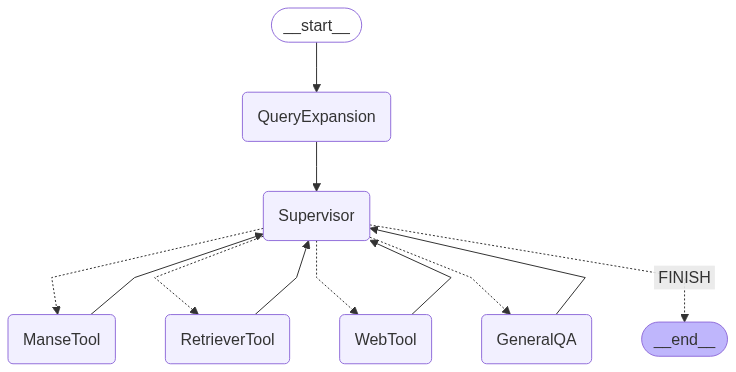

In [45]:
graph

In [46]:
from langchain_core.runnables import RunnableConfig
from langchain_teddynote.messages import random_uuid, stream_graph

# config 설정(재귀 최대 횟수, thread_id)
#config = RunnableConfig(recursion_limit=20, configurable={"thread_id": random_uuid()})
config = RunnableConfig(recursion_limit=20, configurable={"thread_id": 1})

# 질문 입력
inputs = {
    "messages": [
        HumanMessage(
            content="1995년 3월 28일 남자, 12시 30분 출생 운세봐줘"
        )
    ],
}

# 그래프 실행
stream_graph(graph, inputs, config)


🔄 Node: QueryExpansion 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
Could you please provide a fortune reading for a male born on March 28, 1995, at 12:30 PM? I am interested in a detailed analysis of his Four Pillars of Destiny (Ba Zi) and how they may influence his personality, career prospects, and overall life path. Additionally, I would like to understand any significant strengths or challenges indicated in his birth chart analysis. Thank you!1995년 3월 28일 남자, 12시 30분 출생 운세봐줘
🔄 Node: Supervisor 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
{"next":"ManseTool"}
🔄 Node: agent 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 

🔄 Node: tools 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
=== 사주팔자 ===
년주(年柱): 을해
월주(月柱): 기묘
일주(日柱): 무오
시주(時柱): 무오
일간(日干): 무

=== 오행 강약 ===
목: 39점
화: 20점
토: 68점
금: 0점
수: 10점

=== 십신 분석 ===
년주: 천간:정관, 지지:편재(70%), 지지:편관(30%)
월주: 천간:겁재, 지지:정관(100%)
일주: 지지:정인(70%), 지지:겁재(30%)
시주: 지지:정인(70%), 지지:겁재(30%)

=== 대운 (정밀 계산) ===
5세: 무인 (2000년 ~ 

In [47]:
# 추가질문 -> 바로 retriever tool로 들어갔다

In [48]:
from langchain_core.runnables import RunnableConfig
from langchain_teddynote.messages import random_uuid, stream_graph

# config 설정(재귀 최대 횟수, thread_id)
#config = RunnableConfig(recursion_limit=20, configurable={"thread_id": random_uuid()})
config = RunnableConfig(recursion_limit=20, configurable={"thread_id": 1})

# 질문 입력
inputs = {
    "messages": [
        HumanMessage(
            content="대운과 세운분석 자세히 해줘"
        )
    ],
}

# 그래프 실행
stream_graph(graph, inputs, config)


🔄 Node: QueryExpansion 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
Could you provide a detailed analysis of the Major Luck Cycle (Daewoon) and the Annual Luck Cycle (Seewoon) in relation to my Four Pillars of Destiny (Ba Zi)? I am particularly interested in understanding how these cycles influence my overall life path and fortune based on my birth chart.대운과 세운분석 자세히 해줘
🔄 Node: Supervisor 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
{"next":"RetrieverTool"}
🔄 Node: agent 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
안녕하세요. 1995년 3월 28일 12시 30분 출생 남성분의 대운(大運)과 세운(歲運) 분석을 자세히 진행하겠습니다.

---

## 1. 대운(大運) 분석

### 1) 대운 시작 시기 및 진행 방향

- 출생 연도: 1995년 3월 28일 (양력)
- 성별: 남성 → 대운은 생월 기준으로 순행(앞으로) 진행
- 대운 시작 나이: 보통 5세부터 시작

### 2) 대운 목록 및 시기

| 대운 시작 나이 | 대운 천간지지 | 오행 및 특징                      |
|----------------|---------------|---------------------------------|
| 5세 ~ 14세     | 무인(戊寅)    | 토+목: 토의 안정성에 목의 성장성 보완 |
| 15세 ~ 24세    | 정축(丁丑)    | 화+토: 화의 열정과 토의 안정성 결합  |
| 2

In [49]:
from langchain_core.runnables import RunnableConfig
from langchain_teddynote.messages import random_uuid, stream_graph

# config 설정(재귀 최대 횟수, thread_id)
#config = RunnableConfig(recursion_limit=20, configurable={"thread_id": random_uuid()})
config = RunnableConfig(recursion_limit=20, configurable={"thread_id": 1})

# 질문 입력
inputs = {
    "messages": [
        HumanMessage(
            content="난 미래에 대한 대운과 세운분석이 궁금해"
        )
    ],
}

# 그래프 실행
stream_graph(graph, inputs, config)


🔄 Node: QueryExpansion 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
I am curious about the analysis of my luck cycles (Da Yun) and annual luck (Se Yun) in relation to my Four Pillars of Destiny (Ba Zi). Specifically, I would like to understand how these cycles will influence my future and what insights can be drawn from my birth chart analysis.난 미래에 대한 대운과 세운분석이 궁금해
🔄 Node: Supervisor 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
{"next":"RetrieverTool"}
🔄 Node: agent 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
안녕하세요. 1995년 3월 28일 12시 30분 출생 남성분의 미래 대운과 세운 분석을 자세히 안내해 드리겠습니다.

---

## 1. 미래 대운(大運) 분석

### 대운 진행 및 미래 대운 시기

- 현재 나이 약 30세 (2025년 기준)
- 현재 대운: 병자(丙子, 25~34세)
- 이후 대운:
  - 35~44세: 을해(乙亥)
  - 45~54세: 갑술(甲戌)
  - 55~64세: 계신(癸申)
  - 65~74세: 임유(壬酉)

### 각 미래 대운별 특징 및 해석

| 대운 시기 | 대운 천간지지 | 오행 구성 | 해석 및 전망 |
|-----------|---------------|-----------|-------------|
| 35~44세   | 을해(乙亥)    | 목+수     | 목과 수의 조화로 성장과 지혜가 극대화되는 시기입니다. 창의력과 감성이 증대되어 새로운 도전과 발전이 기

In [50]:
# Enhanced Retriever with Query Expansion 테스트
from langchain_core.runnables import RunnableConfig
from langchain_teddynote.messages import random_uuid, stream_graph

# config 설정
config = RunnableConfig(recursion_limit=20, configurable={"thread_id": 2})

# 한글 사주 질문으로 테스트 (Query Expansion이 작동할 질문)
inputs = {
    "messages": [
        HumanMessage(
            content="정관이 뭐야? 상세히 설명해줘"
        )
    ],
}


# 그래프 실행
stream_graph(graph, inputs, config)


🔄 Node: QueryExpansion 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
What is the concept of "正官" (Zheng Guan) in the context of the Four Pillars of Destiny (Ba Zi)? Please provide a detailed explanation, including its significance in a birth chart analysis and how it influences an individual's personality, career, and relationships. Additionally, could you elaborate on how Zheng Guan interacts with other elements in the birth chart?정관이 뭐야? 상세히 설명해줘
🔄 Node: Supervisor 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
{"next":"WebTool"}
🔄 Node: agent 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
"정관"이라는 단어는 여러 분야에서 다르게 사용될 수 있는데, 일반적으로 두 가지 주요 의미가 있습니다. 어떤 의미를 원하시는지에 따라 설명이 달라질 수 있으니, 여기서는 두 가지 주요 의미를 상세히 설명해드리겠습니다.

1. 법률 및 기업 관련 의미의 정관
- 정의: 정관은 회사나 단체가 설립될 때 그 조직의 목적, 조직 구성, 운영 방식 등을 규정한 기본 규칙이나 규약을 말합니다.
- 역할: 회사의 조직과 운영에 관한 기본적인 사항을 정리하여, 회사 내부의 질서 유지와 외부와의 법적 관계를 명확히 합니다.
- 주요 내용: 회사의 명칭, 목적, 본점 소재지, 자본금, 주식의 종류와 수, 임원 구성 및 권한, 이사회 운영 방식, 주주총회 절차 등.
- 법적 효력: 정관은 회

In [51]:
from langchain_core.runnables import RunnableConfig
from langchain_teddynote.messages import random_uuid, invoke_graph

# config 설정(재귀 최대 횟수, thread_id)
config = RunnableConfig(recursion_limit=20, configurable={"thread_id": random_uuid()})

# 질문 입력
inputs = {
    "messages": [
        HumanMessage(
            content="사주의 개념에 대해서 알려줘"
        )
    ],
}

# 그래프 실행
invoke_graph(graph, inputs, config)


🔄 Node: QueryExpansion 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
================================ Human Message =================================

사주의 개념에 대해서 알려줘

🔄 Node: Supervisor 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
next:
WebTool

🔄 Node: agent in [WebTool] 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
================================== Ai Message ==================================

사주(四柱)는 한국과 중국 등 동아시아에서 전통적으로 사용되는 운명학의 한 분야로, 사람의 태어난 연도, 월, 일, 시를 기준으로 하여 그 사람의 운명과 성격, 인생의 흐름 등을 해석하는 체계입니다. '사주'라는 말은 '네 개의 기둥'이라는 뜻으로, 태어난 연도, 월, 일, 시 각각을 한 기둥으로 보고, 이를 바탕으로 분석합니다.

사주는 크게 다음과 같은 요소로 구성됩니다:

1. 천간(天干)과 지지(地支): 각각 10개의 천간과 12개의 지지가 있으며, 이들이 조합되어 연, 월, 일, 시를 나타냅니다.
2. 오행(五行): 목(木), 화(火), 토(土), 금(金), 수(水)의 다섯 가지 원소로, 천간과 지지는 각각 오행에 속합니다.
3. 음양(陰陽): 모든 요소는 음과 양으로 나뉘어 상호작용합니다.

사주를 통해 개인의 성격, 건강, 직업, 인간관계, 운세 등을 예측하고 조언하는 데 활용합니다. 사주는 단순한 운세가 아니라, 자연의 이치와 우주의 법칙을 반영한 철학적 체계로 이해할 수 있습니다.

더 구체적인 내용이나 사주 풀이 방법에 대해 궁금하시면 알려주세요!

🔄 Node: WebTool 🔄
- - - - 

In [52]:
from langchain_core.runnables import RunnableConfig
from langchain_teddynote.messages import random_uuid, stream_graph

# config 설정(재귀 최대 횟수, thread_id)
config = RunnableConfig(recursion_limit=20, configurable={"thread_id": random_uuid()})

# 질문 입력
inputs = {
    "messages": [
        HumanMessage(
            content="사주의 개념에 대해서 알려줘"
        )
    ],
}

# 그래프 실행
stream_graph(graph, inputs, config)


🔄 Node: QueryExpansion 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
Could you please explain the concept of "Four Pillars of Destiny" (Ba Zi) in detail? I am particularly interested in understanding how the elements of the birth chart, which includes the year, month, day, and hour of birth, influence an individual's personality, destiny, and life path. Additionally, I would like to know how the interactions between the Heavenly Stems and Earthly Branches play a role in this analysis.사주의 개념에 대해서 알려줘
🔄 Node: Supervisor 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
{"next":"WebTool"}
🔄 Node: agent 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
사주(四柱)는 한국과 중국 등 동아시아에서 전통적으로 사용되는 운명학의 한 분야로, 사람의 태어난 연도, 월, 일, 시를 기준으로 하여 그 사람의 운명과 성격, 미래의 길흉화복을 예측하는 체계입니다. '사주'라는 말은 '네 기둥'이라는 뜻으로, 태어난 연(년), 월, 일, 시 각각을 한 기둥으로 보아 총 네 기둥으로 구성됩니다.

각 기둥은 천간(天干)과 지지(地支)라는 두 가지 요소로 이루어져 있으며, 천간은 10가지(갑, 을, 병, 정, 무, 기, 경, 신, 임, 계), 지지는 12가지(자, 축, 인, 묘, 진, 사, 오, 미, 신, 유, 술, 해)로 구성되어 있습니다. 이 천간

In [53]:
from langchain_core.runnables import RunnableConfig
from langchain_teddynote.messages import random_uuid, invoke_graph

# config 설정(재귀 최대 횟수, thread_id)
config = RunnableConfig(recursion_limit=20, configurable={"thread_id": random_uuid()})

# 질문 입력
inputs = {
    "messages": [
        HumanMessage(
            content="내일 서울 날씨 알려줘"
        )
    ],
}

# 그래프 실행
invoke_graph(graph, inputs, config)


🔄 Node: QueryExpansion 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
================================ Human Message =================================

내일 서울 날씨 알려줘

🔄 Node: Supervisor 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
next:
WebTool

🔄 Node: agent in [WebTool] 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
================================== Ai Message ==================================
Tool Calls:
  tavily_web_search (call_VhZjrB1AHNdhIBsRA1K8rDgm)
 Call ID: call_VhZjrB1AHNdhIBsRA1K8rDgm
  Args:
    query: 내일 서울 날씨

🔄 Node: tools in [WebTool] 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
================================= Tool Message =================================
Name: tavily_web_search

[{"title": "서울특별시/기후 - 나무위키", "url": "https://namu.wiki/w/서울특별시/기후", "content": "서울 근교 및 경기도 남서부를 제외한 수도권 외곽 지역은 -3°c 기준으로도 완전한 냉대기후이며 [8], 서울은 최한월(1월) 평균기온이 -2.0°c라 냉대기후와 온대기후의 점이지대이다. [9] 그러다가 전국이 시베리아 고기압으로 덮인다면 경기도보다 기온이 높아진다.", "score": 0.36867893, "raw_c

In [54]:
# GeneralQA 도구 테스트 - 일반 질문
from langchain_core.runnables import RunnableConfig
from langchain_teddynote.messages import random_uuid, stream_graph

# config 설정(재귀 최대 횟수, thread_id)
config = RunnableConfig(recursion_limit=20, configurable={"thread_id": 2})

# 일반 질문 입력
inputs = {
    "messages": [
        HumanMessage(
            content="파이썬에서 딕셔너리와 리스트의 차이점을 알려주세요"
        )
    ],
}

# 그래프 실행
stream_graph(graph, inputs, config)



🔄 Node: QueryExpansion 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
Could you explain the differences between a dictionary and a list in Python, particularly in the context of data structures used for organizing information? Additionally, I am interested in understanding how these concepts might relate to the analysis of a birth chart in the Four Pillars of Destiny (Ba Zi), where different elements and their relationships can be represented in various formats.파이썬에서 딕셔너리와 리스트의 차이점을 알려주세요
🔄 Node: Supervisor 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
{"next":"GeneralQA"}
🔄 Node: agent 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 

🔄 Node: tools 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
파파이썬 리이썬 딕셔너리는 다음과 같은 주요 특징을 가지고 있습니다:

**1.스트의 주요 특징은 다음과 같습니다:

**1. 순서가 있는파이썬에서 키-값 쌍 (Key-Value Pair) 기반:**

*   딕 컬렉션 (Ordered Collection):**

*   리스트에 저장된 요소 딕셔너리(Dictionary)와 리스트(List)는 데이터를 저장하고 관리하는 데 사용되는 기본적인 자료 구조이지만, 몇 가지 중요한 차이셔너리는 키(Key)와 값(Value)의 쌍으로 데이터

In [55]:
# GeneralQA 도구 테스트 - 일반 상식 질문
config = RunnableConfig(recursion_limit=20, configurable={"thread_id": 3})

# 일반 상식 질문 입력
inputs = {
    "messages": [
        HumanMessage(
            content="머신러닝과 딥러닝의 차이점은 무엇인가요?"
        )
    ],
}

# 그래프 실행
stream_graph(graph, inputs, config)



🔄 Node: QueryExpansion 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
What are the differences between machine learning and deep learning, particularly in the context of analyzing a birth chart using the Four Pillars of Destiny (Ba Zi)? Additionally, how do these concepts relate to the interpretation of various elements within a birth chart analysis, such as the interactions between the Heavenly Stems and Earthly Branches?머신러닝과 딥러닝의 차이점은 무엇인가요?
🔄 Node: Supervisor 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
{"next":"WebTool"}
🔄 Node: agent 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
머신러닝과 딥러닝의 차이점은 다음과 같습니다:

1. 정의
- 머신러닝(Machine Learning)은 컴퓨터가 명시적으로 프로그래밍되지 않고도 데이터를 통해 학습하고 예측하거나 결정을 내릴 수 있도록 하는 인공지능(AI)의 한 분야입니다.
- 딥러닝(Deep Learning)은 머신러닝의 하위 분야로, 인공신경망(특히 다층 신경망)을 사용하여 데이터에서 특징을 자동으로 학습하는 방법입니다.

2. 구조와 복잡성
- 머신러닝은 주로 특징(feature)을 사람이 직접 설계하고 추출한 후, 이를 기반으로 모델을 학습시킵니다. 예를 들어, 의사결정나무, SVM, 랜덤포레스트 등이 있습니다.
- 딥러닝은 여러 층(layer)의 신경망을 사용하여 데이터에서 자동으로 특징을 추출하고 학습합